<a href="https://colab.research.google.com/github/MithunSR/Gradient_Descent_Tutorial/blob/main/Cost_function_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In this code example, we demonstrate how to build and train a deep learning model using the categorical cross-entropy loss function. We utilize the popular MNIST dataset, which consists of handwritten digits, to train a model that can classify these digits. The code begins by loading and preprocessing the data, normalizing the pixel values and one-hot encoding the target labels. We then create a deep learning model using the Sequential API, comprising a fully connected neural network with two Dense layers. The model is compiled with the Adam optimizer and the categorical cross-entropy loss function. Next, we train the model on the training data for a specified number of epochs, monitoring the training and validation loss. Finally, we visualize the cost function over the epochs to assess the model's training progress. This example serves as a practical illustration of how the categorical cross-entropy loss can be used to optimize the performance of a deep learning model

#Develop Model

##Import Libraries
In the first section, we import the necessary libraries and modules. numpy is used for numerical operations, matplotlib.pyplot is used for plotting, and we import specific components from the tensorflow.keras module, including the MNIST dataset, the Sequential model, Dense layers, and the utility function to_categorical for one-hot encoding the labels.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


##Load dataset

In this section, we load the MNIST dataset using the mnist.load_data() function. The dataset consists of handwritten digits from 0 to 9.

In [9]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


##Preprocess the data

re, we preprocess the data by reshaping the input images into a flat 784-dimensional vector and normalizing the pixel values between 0 and 1. We also one-hot encode the target labels using the to_categorical function.

In [10]:
X_train = X_train.reshape((60000, 784)).astype('float32') / 255.0
X_test = X_test.reshape((10000, 784)).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##Define Deep learning model
In this section, we define the architecture of the deep learning model using the Sequential API. We add two Dense layers to the model. The first layer has 64 units with ReLU activation and takes input with shape (784,), corresponding to the flattened input images. The second layer has 10 units with softmax activation, representing the output probabilities for each digit class.


In [11]:
# Create the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))


##Compile The Model

Here, we compile the model with the Adam optimizer, which is a popular optimization algorithm, and the categorical cross-entropy loss function. We also specify that we want to track the accuracy metric during training.


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


##Train the Model

In this section, we train the model using the fit function. We provide the training data (X_train and y_train), specify the number of epochs, batch size, and validation data (X_test and y_test). The training process updates the model's parameters to minimize the loss function.

In [13]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4238 - accuracy: 0.8849 - val_loss: 0.2354 - val_accuracy: 0.9326
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2100 - accuracy: 0.9410 - val_loss: 0.1910 - val_accuracy: 0.9452
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1636 - accuracy: 0.9539 - val_loss: 0.1510 - val_accuracy: 0.9546
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1356 - accuracy: 0.9610 - val_loss: 0.1370 - val_accuracy: 0.9586
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1155 - accuracy: 0.9669 - val_loss: 0.1230 - val_accuracy: 0.9623
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1011 - accuracy: 0.9704 - val_loss: 0.1169 - val_accuracy: 0.9648
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0893 - accuracy: 0.9743 - val_loss: 0.1099 - val_accuracy: 0.9672
Epoch 

##Plot the training and validation loss

Finally, we plot the training and validation loss over the epochs. This visualization helps us understand how the cost function (loss) changes during the training process. The goal is to observe a decreasing trend in the loss, indicating that the model is learning and optimizing its performance.

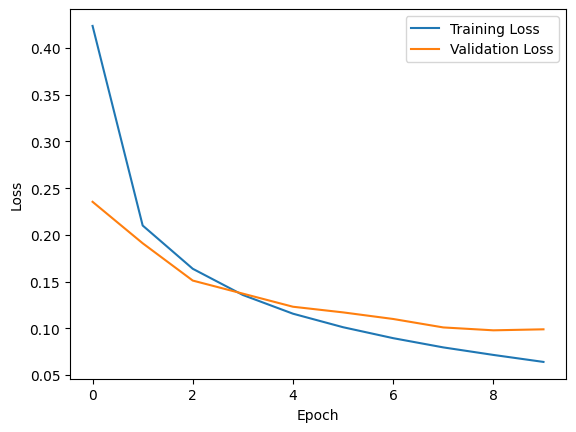

In [14]:
# Plot the cost function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
